skewed distribution:  you can use (Q1 - 1.5IQR) and (Q3 + 1.5IQR) for removing otliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("placements.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

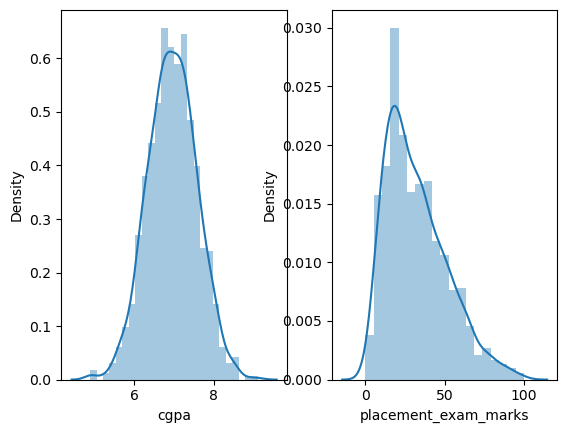

In [3]:
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

In [4]:
df['cgpa'].skew(), df['placement_exam_marks'].skew()

(-0.014529938929314918, 0.8356419499466834)

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

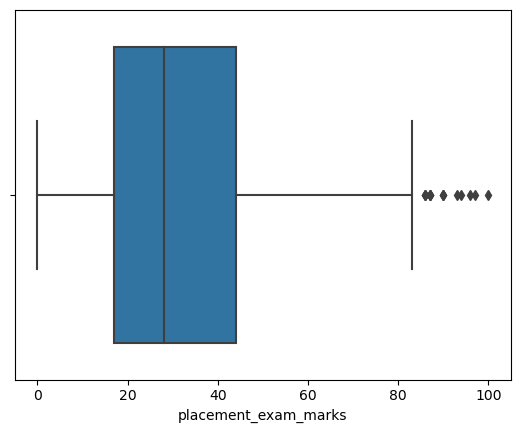

In [6]:
sns.boxplot(df['placement_exam_marks'])

In [7]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [8]:
percentile25,percentile75

(17.0, 44.0)

In [9]:
iqr = percentile75-percentile25
iqr

27.0

In [10]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
lower_limit,upper_limit 

(-23.5, 84.5)

In [11]:
df[df['placement_exam_marks']> upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [12]:
df[df['placement_exam_marks']< lower_limit]

,cgpa,placement_exam_marks,placed


In [13]:
new_df=df[df['placement_exam_marks']< upper_limit]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [14]:
new_df.shape

(985, 3)

<AxesSubplot:xlabel='placement_exam_marks'>

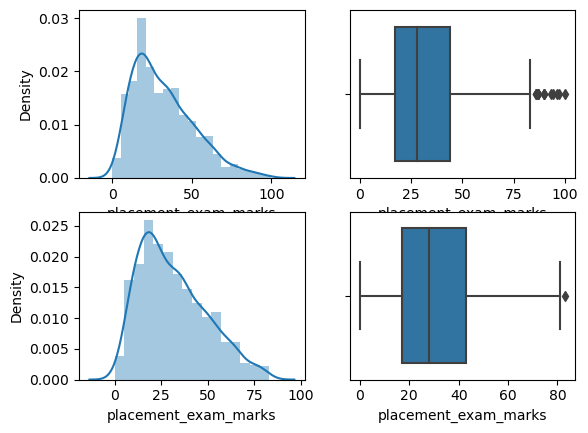

In [15]:
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'])

In [16]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [17]:
new_df_cap.shape

(1000, 3)

<AxesSubplot:xlabel='placement_exam_marks'>

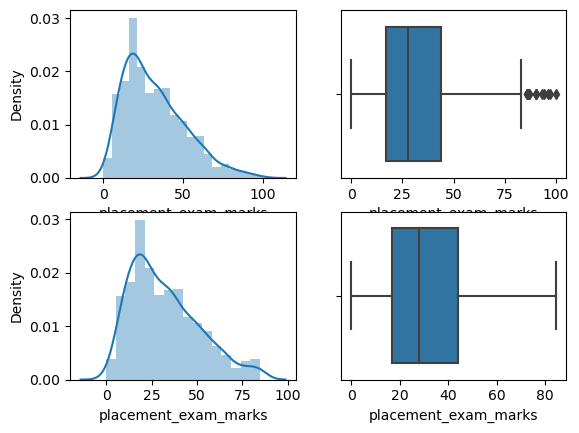

In [18]:
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])